In [1]:
! pip3 install curl

You are using pip version 19.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
# download dataset

In [4]:
! curl https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.date  -o ./adult.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   414  100   414    0     0    455      0 --:--:-- --:--:-- --:--:--   455


In [5]:
# read the dataset

In [6]:
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
    header=None)
df.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]


In [7]:
df.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df.count()

Age              32561
WorkClass        32561
fnlwgt           32561
Education        32561
EducationNum     32561
MaritalStatus    32561
Occupation       32561
Relationship     32561
Race             32561
Gender           32561
CapitalGain      32561
CapitalLoss      32561
HoursPerWeek     32561
NativeCountry    32561
Income           32561
dtype: int64

In [9]:
# create train & test datasets

In [10]:
train_cols = df.columns[0:-1]
label = df.columns[-1]
X = df[train_cols]
y = df[label].apply(lambda x: 0 if x == " <=50K" else 1) #Turning response into 0 and 1

seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [11]:
# Explore the dataset

In [12]:
! pip install interpret

You should consider upgrading via the '/Users/jinli/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [13]:
from interpret import show
from interpret.data import ClassHistogram

hist = ClassHistogram().explain_data(X_train, y_train, name = 'Train Data')
show(hist)

<!-- http://127.0.0.1:7280/112206139024/ -->

In [14]:
#Train the Explainable Boosting Machine (EBM)

In [15]:

import time

In [16]:
from interpret.glassbox import ExplainableBoostingClassifier, LogisticRegression, ClassificationTree, DecisionListClassifier

ebm = ExplainableBoostingClassifier(random_state=seed)
start = time.time()
ebm.fit(X_train, y_train)   
print('It takes {} seconds'.format(time.time()-start))

It takes 136.03175711631775 seconds


In [17]:
# Global Explanations: What the model learned overall

In [18]:

ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

<!-- http://127.0.0.1:7280/112258349520/ -->

In [19]:
# Evaluate EBM performance

In [20]:

from interpret.perf import ROC

ebm_perf = ROC(ebm.predict_proba).explain_perf(X_test, y_test, name='EBM')
show(ebm_perf)

<!-- http://127.0.0.1:7280/112241468880/ -->

In [21]:

from collections import Counter

print('In the training set', Counter(y_train).most_common())
print('\nIn the testing set', Counter(y_test).most_common())

In the training set [(0, 19694), (1, 6354)]

In the testing set [(0, 5026), (1, 1487)]


In [22]:
! pip install scikit-plot

You should consider upgrading via the '/Users/jinli/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


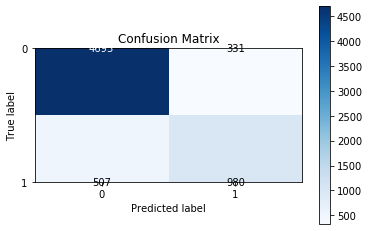

In [23]:

import scikitplot as skplt

%matplotlib inline 

preds = ebm.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, preds)
plt.show()

In [24]:

from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)

0.8713342545677875